# Esempi con la classe `Series`

In questo notebook mostriamo come utilizzare la classe `Series` per raccogliere le serie temporali generate dal sistema di Lorenz 63 al variare del parametro di controllo $\rho$.


Il sistema **Lorenz 63** è un modello a tre equazioni differenziali ordinarie derivato da una 
semplificazione delle equazioni di convezione di Rayleigh–Bénard. Le sue equazioni sono:


$$\dot{x} = \sigma (y - x),\quad \dot{y} = x (r - z) - y,\quad \dot{z} = x y - b z$$

Per i parametri canonici $\sigma = 10$, $b = 8/3$ e $r \approx 28$ il sistema produce il celebre **attrattore a farfalla** con traiettorie caotiche che saltano fra i due lobi【873283717628400†L24-L29】.  
Quando il parametro di controllo $r$ è minore di ~24.74 la dinamica converge a un equilibrio o a cicli limite, mentre valori più alti portano a una perdita di stabilità via una biforcazione di Hopf e quindi al caos【873283717628400†L85-L90】.  


In questa analisi consideriamo i valori di $r = 10,15,20,24,26,28,35$ per attraversare i regimi periodici (r bassi) e caotici (r alti), confrontando i risultati con una serie **stocastica** (rumore bianco).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
from series import Series
from timeseries_generators import lorenz63, logistic_map, henon_map


In [2]:
r_values = [10, 15, 20, 24, 26, 28, 35]
dt = 0.01
steps = 6000
transient = 2000
sigma = 10.0
beta = 8.0 / 3.0

lorenz_series_instances = []
for rho in r_values:
    trajectory = lorenz63(sigma=sigma, rho=rho, beta=beta, dt=dt, steps=steps, transient=transient)
    x_component = trajectory[:, 0]
    normalized = (x_component - np.mean(x_component)) / np.std(x_component)
    series = Series(
        name="Lorenz 63",
        data=normalized,
        parameters={"sigma": sigma, "rho": rho, "beta": beta, "dt": dt},
        metadata={"component": "x"},
    )
    lorenz_series_instances.append(series)

summary = pd.DataFrame(
    {
        "rho": [s.parameters["rho"] for s in lorenz_series_instances],
        "campioni": [s.n_samples for s in lorenz_series_instances],
        "componenti": [s.n_components for s in lorenz_series_instances],
    }
)
summary

,rho,campioni,componenti
0,10,6000,1
1,15,6000,1
2,20,6000,1
3,24,6000,1
4,26,6000,1
5,28,6000,1
6,35,6000,1


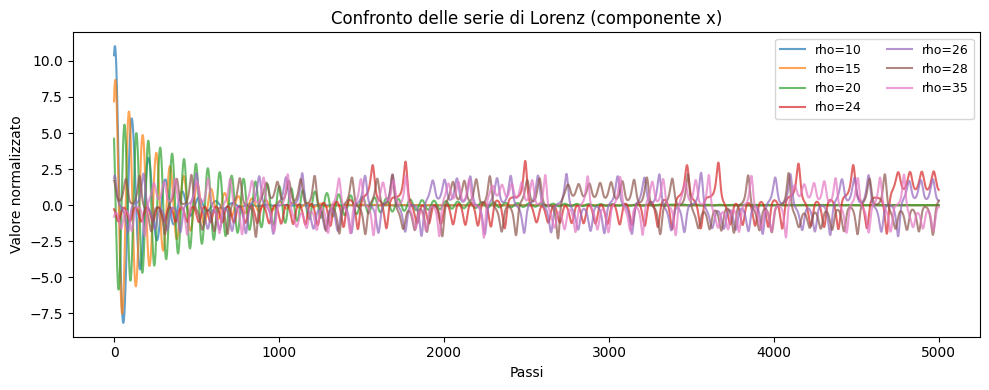

In [4]:
plt.figure(figsize=(10, 4))
for series in lorenz_series_instances:
    label = f"rho={series.parameters['rho']}"
    plt.plot(series.component(0)[:5000], label=label, alpha=0.7)
plt.title("Confronto delle serie di Lorenz (componente x)")
plt.xlabel("Passi")
plt.ylabel("Valore normalizzato")
plt.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()

In [ ]:
logistic_params = {"r": 3.9, "x0": 0.5, "steps": 6000, "transient": 1000}
logistic_data = logistic_map(**logistic_params)
logistic_mean = np.mean(logistic_data)
logistic_std = np.std(logistic_data)
if logistic_std == 0.0:
    logistic_std = 1.0
logistic_normalized = (logistic_data - logistic_mean) / logistic_std
logistic_series = Series(
    name="Mappa logistica",
    data=logistic_normalized,
    parameters=logistic_params,
    metadata={"component": "x"},
)

logistic_summary = pd.DataFrame(
    {
        "campioni": [logistic_series.n_samples],
        "componenti": [logistic_series.n_components],
        "media": [float(np.mean(logistic_series.component(0)))],
        "std": [float(np.std(logistic_series.component(0)))],
    },
    index=[logistic_series.name],
)
display(logistic_summary)

plt.figure(figsize=(8, 3))
plt.plot(logistic_series.component(0)[:1000], label="mappa logistica")
plt.xlabel("Passi")
plt.ylabel("Valore normalizzato")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
henon_params = {"a": 1.4, "b": 0.3, "x0": 0.1, "y0": 0.3, "steps": 6000, "transient": 1000}
henon_data = henon_map(**henon_params)
henon_mean = np.mean(henon_data, axis=0)
henon_std = np.std(henon_data, axis=0)
henon_std[henon_std == 0.0] = 1.0
henon_normalized = (henon_data - henon_mean) / henon_std
henon_series = Series(
    name="Mappa di Hénon",
    data=henon_normalized,
    parameters=henon_params,
    metadata={"componenti": ["x", "y"]},
)

henon_summary = pd.DataFrame(
    {
        "campioni": [henon_series.n_samples],
        "componenti": [henon_series.n_components],
    },
    index=[henon_series.name],
)
display(henon_summary)

plt.figure(figsize=(8, 3))
plt.plot(henon_series.component(0)[:1000], label="x")
plt.plot(henon_series.component(1)[:1000], label="y", alpha=0.7)
plt.xlabel("Passi")
plt.ylabel("Valore normalizzato")
plt.title("Componenti normalizzate della mappa di Hénon")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(
    henon_series.component(0)[:2000],
    henon_series.component(1)[:2000],
    s=2,
    alpha=0.5,
    label="attrattore",
)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Attrattore della mappa di Hénon (prime 2000 iterazioni)")
plt.legend()
plt.tight_layout()
plt.show()
